# Data Analytics Project Work

In [12]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Testing on reading one of the datasets and creating a Pandas DataFrame - object
test_df = pd.read_csv("HybridDataset_for_RSSbasedLocalization-main/Scenario 0/RPI/RSS_BLT_Dataset/Distanza10.csv", sep=';')
test_df.head()

,Timestamp,Rx Power [dBm]
0,Fri Mar 24 14:13:33 2023,-79
1,Fri Mar 24 14:13:34 2023,-70
2,Fri Mar 24 14:13:36 2023,-73
3,Fri Mar 24 14:13:38 2023,-79
4,Fri Mar 24 14:13:39 2023,-76


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       517 non-null    object
 1   Rx Power [dBm]  517 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


In [14]:
def read_data(anchors, directory_path):
    """
    Reads the csv-files for one specified measurement case and adds them into a dict of dataframes.
    
    Parameters:
    anchors (list): List of anchors, for example ["Anchor 1", "Anchor 2", "Anchor 3"...]
    directory path (string): The relative directory path of the folder which contains the wanted anchor-csv.files.

    returns: 
    dict: a dict which keys are the anchor names and values are the respective dataframes
    """
    scenario_dataframes = {}

    if "Scenario B" in directory_path:
        for anchor in anchors:
            current_df = pd.read_csv(directory_path + anchor + ".csv", sep=';')
            scenario_dataframes[anchor.replace(".csv","")] = current_df
    else:
        for anchor in anchors[:-1]:
            current_df = pd.read_csv(directory_path + anchor + ".csv", sep=';')
            scenario_dataframes[anchor.replace(".csv","")] = current_df
    
    return scenario_dataframes


In [15]:
def calculate_mean_values_with_bursts(scenario_dataframe, bursts):
    """
    Calculates the mean value over a given amount of bursts.

    Parameters:
    scenario_dataframe (DataFrame): A DataFrame-object containing the dataset of one anchor.
    bursts (int): The amount of bursts.

    Returns:
    int: Returns the mean value over the given amount of bursts.
    """

    mean_values = []

    power_values = scenario_dataframe["Rx Power [dBm]"].to_list()
    list_size = len(power_values)
    burst_size = list_size // bursts

    start = 0
    for i in range(bursts):
        end = start + burst_size if i < bursts - 1 else list_size - 1
        mean_values.append(power_values[end])
        start = end
        
    mean_value = round(np.mean(mean_values), 4)
    
    return mean_value

In [16]:
def calculate_mean(scenario_dataframe):
    """
    """
    
    power_values = scenario_dataframe["Rx Power [dBm]"].to_list()
    mean = round(np.mean(power_values), 4)

    return mean

In [17]:
def calculate_median(scenario_dataframe):
    """
    """

    power_values = scenario_dataframe["Rx Power [dBm]"].to_list()
    median = round(np.median(power_values),4)

    return median


In [18]:
def calculate_variance(scenario_dataframe): 
    """
    """

    power_values = scenario_dataframe["Rx Power [dBm]"].to_list()
    variance = round(np.var(power_values))

    return variance

In [19]:
def calculate_estimates(p_initial, n_value, mean_values):
    """
    Calculates the distance estimates for each anchor.

    Parameteres:
    p_initial (int): The initial RSS value for the distance estimation equation.
    n_value (int): The n_value for the distance estimation formula.
    mean_values (dict): A dict which keys are the anchor names and values are their respective mean values over the given amount of bursts

    Returns:
    dict: Returns a dict which keys are the anchor names and values are their respective distance estimations.
    """
    estimated_distances = {}

    for anchor in mean_values:
        estimated_d = 10**((p_initial-mean_values[anchor])/(10*n_value))
        estimated_distances[anchor] = estimated_d

    return estimated_distances

In [20]:
def draw_boxplot(dataframes):
    """
    """

    power_values = []
    for anchor in dataframes:
        power_values.append(dataframes[anchor]["Rx Power [dBm]"].to_list())

    plt.boxplot(power_values)

    plt.xlabel('Anchors')
    plt.ylabel('Power Values')
    plt.title('Boxplot for Power Values for Each Anchor')

    if len(dataframes) == 6:
        plt.xticks([1, 2, 3, 4, 5, 6], ['Anchor 1', 'Anchor 2', 'Anchor 3', 'Anchor 4', 'Anchor 5', 'Anchor 6'])
    else:
        plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Anchor 1', 'Anchor 2', 'Anchor 3', 'Anchor 4', 'Anchor 5', 'Anchor 6', "Anchor 7"])


    plt.show()
    

In [21]:
anchors = ["Anchor 1", "Anchor 2", "Anchor 3", "Anchor 4", "Anchor 5", "Anchor 6", "Anchor 7"]
directory_paths = {"Scenario A, BLT Dataset" : "HybridDataset_for_RSSbasedLocalization-main/Scenario A/RPI/RSS_BLT_Dataset/", 
                    "Scenario A, WiFi Dataset" :"HybridDataset_for_RSSbasedLocalization-main/Scenario A/RPI/RSS_WiFi_Dataset/",
                    "Scenario B, BLT Dataset" : "HybridDataset_for_RSSbasedLocalization-main/Scenario B/RPI/RSS_BLT_Dataset/",
                    "Scenario B, WiFi Dataset" : "HybridDataset_for_RSSbasedLocalization-main/Scenario B/RPI/RSS_WiFi_Dataset/",
                    "Scenario C, BLT Dataset" : "HybridDataset_for_RSSbasedLocalization-main/Scenario C/RPI/RSS_BLT_Dataset/",
                    "Scenario C, WiFi Dataset" : "HybridDataset_for_RSSbasedLocalization-main/Scenario C/RPI/RSS_WiFi_Dataset/"}


Scenario A, BLT Dataset

Anchor 1 mean value: -71.3199
Anchor 2 mean value: -75.9606
Anchor 3 mean value: -69.5906
Anchor 4 mean value: -70.6858
Anchor 5 mean value: -72.9581
Anchor 6 mean value: -59.8973

Anchor 1 median value: -71.0
Anchor 2 median value: -75.0
Anchor 3 median value: -71.0
Anchor 4 median value: -71.0
Anchor 5 median value: -72.0
Anchor 6 median value: -60.0

Anchor 1 variance value: 5
Anchor 2 variance value: 9
Anchor 3 variance value: 20
Anchor 4 variance value: 12
Anchor 5 variance value: 5
Anchor 6 variance value: 2



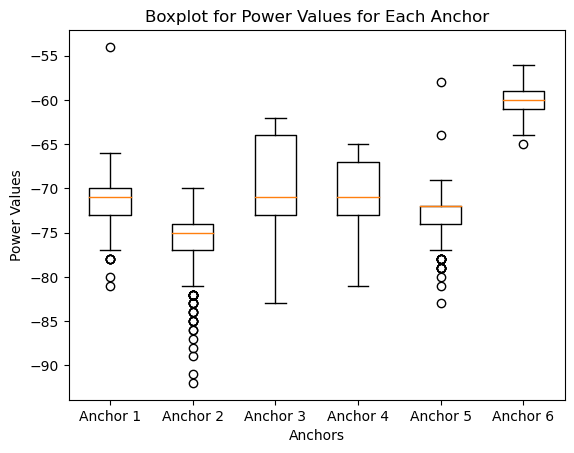


Scenario A, WiFi Dataset

Anchor 1 mean value: -65.5675
Anchor 2 mean value: -55.9005
Anchor 3 mean value: -53.4194
Anchor 4 mean value: -47.6387
Anchor 5 mean value: -60.1182
Anchor 6 mean value: -54.8501

Anchor 1 median value: -67.0
Anchor 2 median value: -57.0
Anchor 3 median value: -53.0
Anchor 4 median value: -48.0
Anchor 5 median value: -61.0
Anchor 6 median value: -56.0

Anchor 1 variance value: 84
Anchor 2 variance value: 112
Anchor 3 variance value: 124
Anchor 4 variance value: 84
Anchor 5 variance value: 118
Anchor 6 variance value: 106



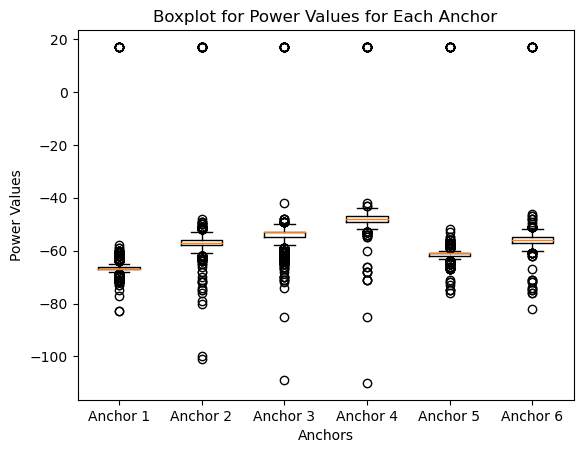


Scenario B, BLT Dataset

Anchor 1 mean value: -66.426
Anchor 2 mean value: -68.0917
Anchor 3 mean value: -81.299
Anchor 4 mean value: -86.8789
Anchor 5 mean value: -74.0924
Anchor 6 mean value: -68.7188
Anchor 7 mean value: -70.9867

Anchor 1 median value: -67.0
Anchor 2 median value: -67.0
Anchor 3 median value: -80.0
Anchor 4 median value: -87.0
Anchor 5 median value: -76.0
Anchor 6 median value: -70.0
Anchor 7 median value: -71.0

Anchor 1 variance value: 5
Anchor 2 variance value: 10
Anchor 3 variance value: 32
Anchor 4 variance value: 9
Anchor 5 variance value: 43
Anchor 6 variance value: 19
Anchor 7 variance value: 4



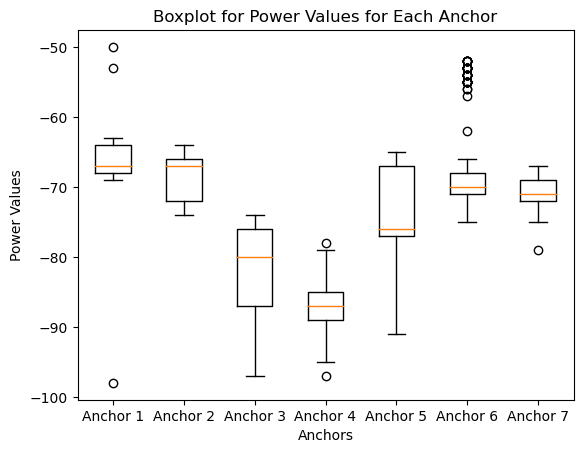


Scenario B, WiFi Dataset

Anchor 1 mean value: -66.6825
Anchor 2 mean value: -62.0546
Anchor 3 mean value: -72.467
Anchor 4 mean value: -74.1485
Anchor 5 mean value: -63.0277
Anchor 6 mean value: -66.0592
Anchor 7 mean value: -57.8729

Anchor 1 median value: -69.0
Anchor 2 median value: -63.0
Anchor 3 median value: -73.0
Anchor 4 median value: -75.0
Anchor 5 median value: -65.0
Anchor 6 median value: -67.0
Anchor 7 median value: -59.0

Anchor 1 variance value: 212
Anchor 2 variance value: 83
Anchor 3 variance value: 41
Anchor 4 variance value: 196
Anchor 5 variance value: 208
Anchor 6 variance value: 105
Anchor 7 variance value: 138



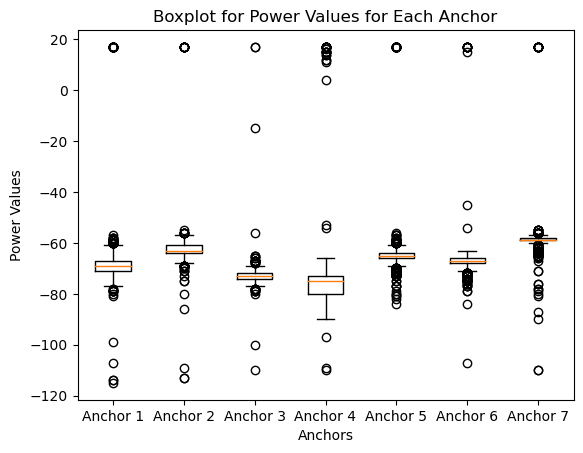


Scenario C, BLT Dataset

Anchor 1 mean value: -73.2592
Anchor 2 mean value: -71.1972
Anchor 3 mean value: -53.5812
Anchor 4 mean value: -67.5342
Anchor 5 mean value: -69.5829
Anchor 6 mean value: -72.5743

Anchor 1 median value: -72.0
Anchor 2 median value: -71.0
Anchor 3 median value: -54.0
Anchor 4 median value: -67.0
Anchor 5 median value: -68.0
Anchor 6 median value: -71.0

Anchor 1 variance value: 42
Anchor 2 variance value: 5
Anchor 3 variance value: 2
Anchor 4 variance value: 4
Anchor 5 variance value: 7
Anchor 6 variance value: 23



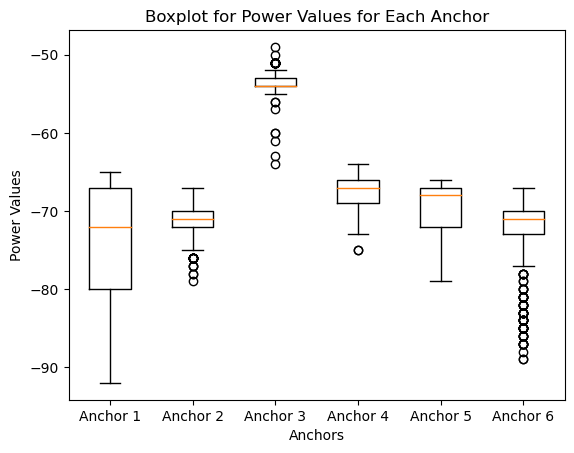


Scenario C, WiFi Dataset

Anchor 1 mean value: -55.3887
Anchor 2 mean value: -54.4799
Anchor 3 mean value: -48.4529
Anchor 4 mean value: -54.8206
Anchor 5 mean value: -53.9553
Anchor 6 mean value: -55.2649

Anchor 1 median value: -55.0
Anchor 2 median value: -55.0
Anchor 3 median value: -49.0
Anchor 4 median value: -55.0
Anchor 5 median value: -54.0
Anchor 6 median value: -57.0

Anchor 1 variance value: 98
Anchor 2 variance value: 141
Anchor 3 variance value: 106
Anchor 4 variance value: 99
Anchor 5 variance value: 124
Anchor 6 variance value: 139



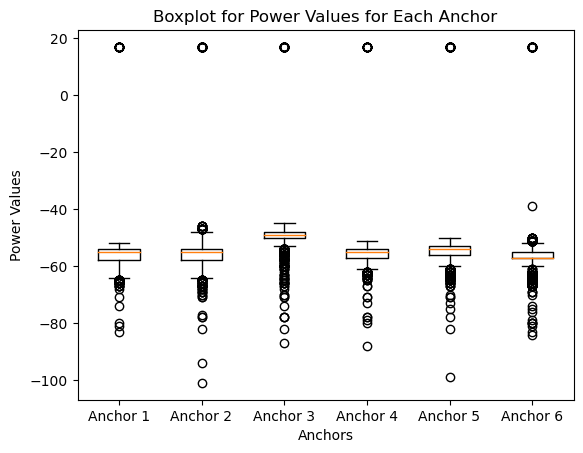

In [22]:
for key in directory_paths:
    
    dataframes = read_data(anchors, directory_paths[key])
    print(key)
    print("")

    bursts = 10

    mean_values = {}
    median_values = {}
    variance_values = {}
    for anchor in dataframes:
        mean_values[anchor] = calculate_mean(dataframes[anchor])
        print(anchor, "mean value:", mean_values[anchor])

    print("")

    for anchor in dataframes:
        median_values[anchor] = calculate_median(dataframes[anchor])
        print(anchor, "median value:" , median_values[anchor])

    print("")

    for anchor in dataframes:
        variance_values[anchor] = calculate_variance(dataframes[anchor])
        print(anchor, "variance value:", variance_values[anchor])

    p_initial = -40
    n_value = 2.8
    estimated_distances = calculate_estimates(p_initial, n_value, mean_values)

    print("")

    draw_boxplot(dataframes)

    print("")




#for anchor in anchors:
#    print(anchor, "Estimated distance:", estimated_distances[anchor])